In [588]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd

## Here are the type of questions we will try to answer
- in which departement are the salary the highest / lowest ?
- which departement is doing a good job in term of gender salary
- can we do cluster for salaries & departements info ?

In [589]:
df = pd.read_csv('net_salary_per_town_categories.csv')

In [590]:
df.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9


In [591]:
df_firms = pd.read_csv('base_etablissement_par_tranche_effectif.csv')

In [592]:
df_firms.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [593]:
#let's merge the two dataframes with salaries and firms details
df_merged = pd.merge(df,df_firms,how='left',on=['CODGEO','LIBGEO'])

In [594]:
df_merged.columns

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'REG', 'DEP', 'E14TST',
       'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50',
       'E14TS100', 'E14TS200', 'E14TS500'],
      dtype='object')

In [595]:
df_merged.head()

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,996.0,577.0,272.0,63.0,46.0,24.0,9.0,3.0,2.0,0.0
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,124.0,87.0,20.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,314.0,130.0,97.0,33.0,28.0,16.0,5.0,5.0,0.0,0.0
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,116.0,79.0,28.0,4.0,0.0,1.0,1.0,3.0,0.0,0.0
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,101.0,79.0,12.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0


In [596]:
#rename the columns to make it more user friendly
# Mean_Net_Salary = Mean Net Salary
# F/M = Female/Male
# EXE = executives
# MID = middle class
# EMP = employees
# WOR = workers
# 1825 = between 18 and 25 years old
# 2650 = between 26 and 50 years old
# 50P = more than 50 years old
# TOTxx = total number of firms for a given size
# 15 = between 1 and 5 employees
# 69 = between 6 and 9 employees
# 1019 = between 10 and 19 employees
# 2049 = between 20 and 49 employees
# 5099 = between 50 and 99 employees
# 100199 = between 100 and 199 employees
# 200499 = between 200 and 499 employees
# 500P = more than 500 employees
df_merged.columns

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'REG', 'DEP', 'E14TST',
       'E14TS0ND', 'E14TS1', 'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50',
       'E14TS100', 'E14TS200', 'E14TS500'],
      dtype='object')

In [597]:
mapping = {'CODGEO' : "Inseecode", 'LIBGEO' : "City", 'SNHM14' :"Mean_Net_Salary", 'SNHMC14' : "Mean_Net_Salary_Exe", 
           'SNHMP14' : "Mean_Net_Salary_Mid", 'SNHME14' : "Mean_Net_Salary_Emp",'SNHMO14' : "Mean_Net_Salary_Wor", 'SNHMF14' : "Mean_Net_Salary_F",
           'SNHMFC14'  : "Mean_Net_Salary_F_Exe", 'SNHMFP14' : "Mean_Net_Salary_F_Mid", 'SNHMFE14' : "Mean_Net_Salary_F_Emp", 'SNHMFO14' : "Mean_Net_Salary_F_Wor",
           'SNHMH14' : "Mean_Net_Salary_M", 'SNHMHC14' : "Mean_Net_Salary_M_Exe", 'SNHMHP14' : "Mean_Net_Salary_M_Mid", 'SNHMHE14' : "Mean_Net_Salary_M_Emp", 
           'SNHMHO14' : "Mean_Net_Salary_M_Wor", 'SNHM1814': "Mean_Net_Salary_18_25",
           'SNHM2614' : "Mean_Net_Salary_26_50", 'SNHM5014' : "Mean_Net_Salary_50P", 'SNHMF1814' : "Mean_Net_Salary_F_18_25", 'SNHMF2614' : "Mean_Net_Salary_F_26_50", 
           'SNHMF5014' : "Mean_Net_Salary_F_50P",'SNHMH1814' : 'Mean_Net_Salary_M_18_25', 'SNHMH2614' : "Mean_Net_Salary_M_26_50", 'SNHMH5014' : "Mean_Net_Salary_M_50P",
           'REG' : "Region", 'DEP' : "Departement", 'E14TST' : "Total_Firms",
           'E14TS0ND' : "Total_Unknown", 'E14TS1' : "Total_1_5", 'E14TS6' : "Total_6_9", 'E14TS10' : "Total_10_19", 'E14TS20' : "Total_20_49",
           'E14TS50' : "Total_50_99",'E14TS100' : "Total_100_199", 'E14TS200' : "Total_200_499", 'E14TS500' : "Total_500P"}

In [598]:
#remapping the column names
df_merged.rename(columns=mapping,inplace=True)

In [599]:
df_merged

,Inseecode,City,Mean_Net_Salary,Mean_Net_Salary_Exe,Mean_Net_Salary_Mid,Mean_Net_Salary_Emp,Mean_Net_Salary_Wor,Mean_Net_Salary_F,Mean_Net_Salary_F_Exe,Mean_Net_Salary_F_Mid,...,Total_Firms,Total_Unknown,Total_1_5,Total_6_9,Total_10_19,Total_20_49,Total_50_99,Total_100_199,Total_200_499,Total_500P
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,996.0,577.0,272.0,63.0,46.0,24.0,9.0,3.0,2.0,0.0
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,124.0,87.0,20.0,10.0,5.0,2.0,0.0,0.0,0.0,0.0
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,314.0,130.0,97.0,33.0,28.0,16.0,5.0,5.0,0.0,0.0
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,116.0,79.0,28.0,4.0,0.0,1.0,1.0,3.0,0.0,0.0
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,101.0,79.0,12.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,109.0,66.0,27.0,6.0,6.0,0.0,2.0,2.0,0.0,0.0
6,01031,Bellignat,12.4,24.0,13.1,10.5,10.4,10.9,20.7,11.8,...,252.0,112.0,80.0,24.0,18.0,11.0,4.0,3.0,0.0,0.0
7,01032,Béligneux,14.0,23.1,15.3,10.9,11.3,12.4,20.5,13.9,...,177.0,92.0,53.0,9.0,11.0,12.0,0.0,0.0,0.0,0.0
8,01033,Bellegarde-sur-Valserine,11.5,21.2,13.5,9.9,10.5,10.3,20.8,12.3,...,655.0,373.0,203.0,36.0,21.0,16.0,4.0,2.0,0.0,0.0
9,01034,Belley,12.4,23.4,14.1,10.3,10.5,11.0,21.5,13.0,...,708.0,421.0,191.0,40.0,25.0,18.0,8.0,3.0,2.0,0.0


In [600]:
# there are few NaN values that need to be handled
df_merged.isnull().sum()

Inseecode                  0
City                       0
Mean_Net_Salary            0
Mean_Net_Salary_Exe        0
Mean_Net_Salary_Mid        0
Mean_Net_Salary_Emp        0
Mean_Net_Salary_Wor        0
Mean_Net_Salary_F          0
Mean_Net_Salary_F_Exe      0
Mean_Net_Salary_F_Mid      0
Mean_Net_Salary_F_Emp      0
Mean_Net_Salary_F_Wor      0
Mean_Net_Salary_M          0
Mean_Net_Salary_M_Exe      0
Mean_Net_Salary_M_Mid      0
Mean_Net_Salary_M_Emp      0
Mean_Net_Salary_M_Wor      0
Mean_Net_Salary_18_25      0
Mean_Net_Salary_26_50      0
Mean_Net_Salary_50P        0
Mean_Net_Salary_F_18_25    0
Mean_Net_Salary_F_26_50    0
Mean_Net_Salary_F_50P      0
Mean_Net_Salary_M_18_25    0
Mean_Net_Salary_M_26_50    0
Mean_Net_Salary_M_50P      0
Region                     6
Departement                6
Total_Firms                6
Total_Unknown              6
Total_1_5                  6
Total_6_9                  6
Total_10_19                6
Total_20_49                6
Total_50_99   

In [601]:
# dropping the NaN values
df_merged.dropna(how='any',inplace=True)

In [602]:
df_merged['Diff_Mean_Net_Salary_M_F']=df_merged['Mean_Net_Salary_M']-df_merged['Mean_Net_Salary_F']

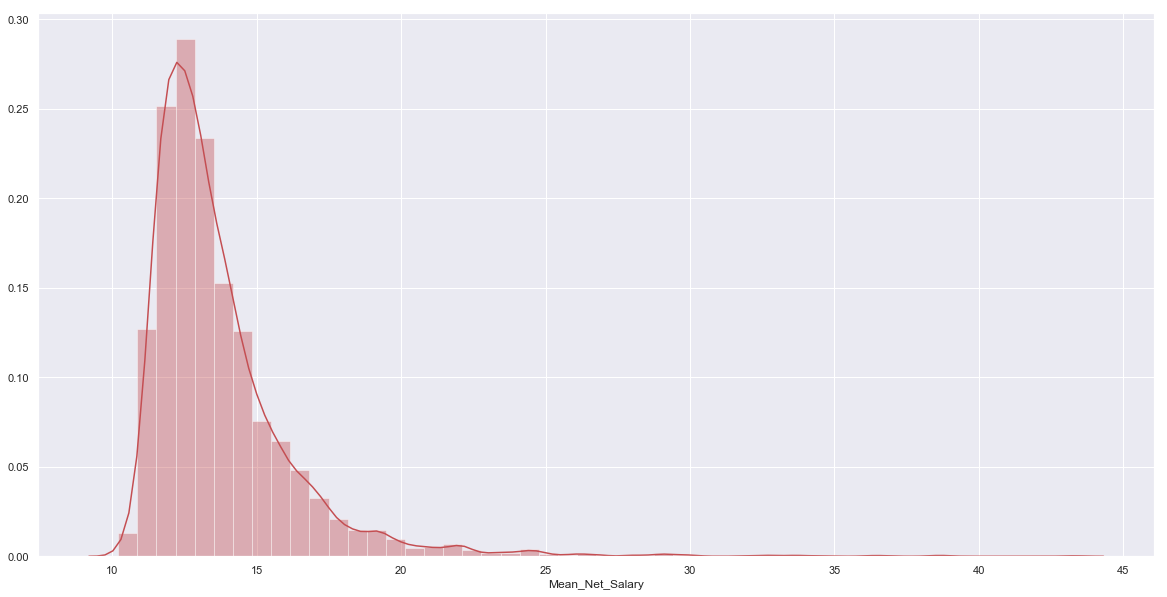

In [603]:
#here is the distribution of Mean salary in France
fig=plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
sns.distplot(top['Mean_Net_Salary'],ax=ax1,hist=True,color='r');


In [604]:
#Let's plot the top10 + bottom10 cities in France (salary wise)
top = df_merged.sort_values(by='Mean_Net_Salary',ascending=False)
#get the top10 cities salary wise
top10_cities = top[:10]
top10_cities
#get the bottom10 cities salary wise
bottom10_cities = top[-10:]
bottom10_cities
#put all together in a dataframe
top10_bottom10_cities = pd.concat([top10_cities,bottom10_cities])


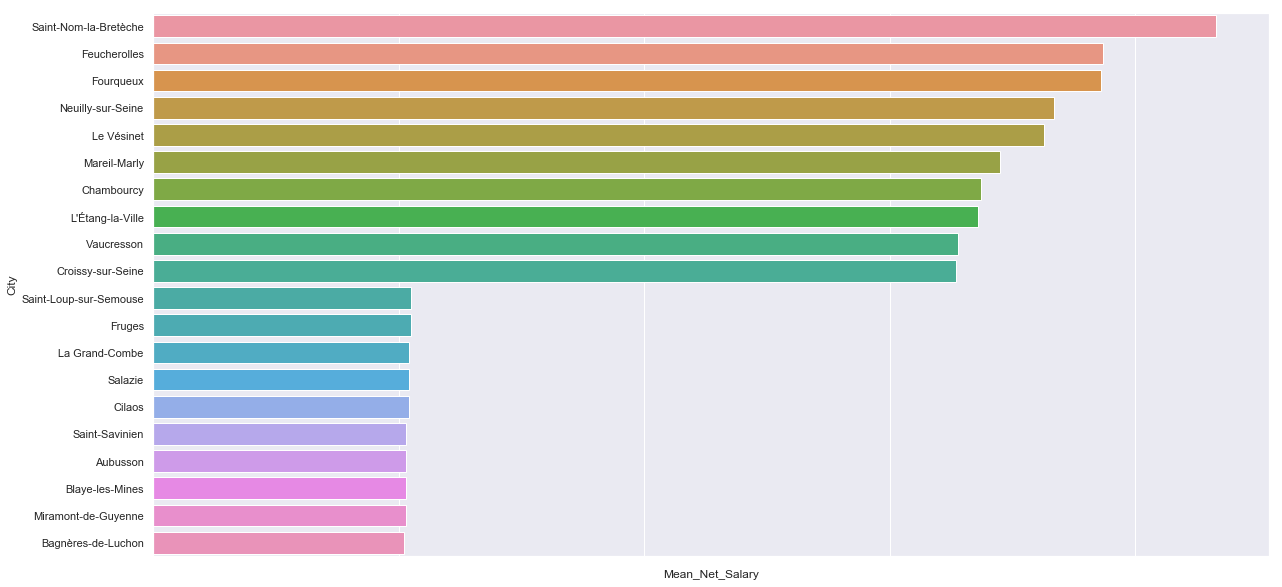

In [605]:
fig=plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
snsbp = sns.barplot(data=top10_bottom10_cities,y='City',x='Mean_Net_Salary',ax=ax1,capsize=.2);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90);


In [606]:
# Let's focus on Departements now. In which department are the salary the highest ? (mean net salary per hour)
df_dep=df_merged.groupby(['Departement'], as_index=False).mean().sort_values(by='Mean_Net_Salary',ascending=False)
df_dep

,Departement,Mean_Net_Salary,Mean_Net_Salary_Exe,Mean_Net_Salary_Mid,Mean_Net_Salary_Emp,Mean_Net_Salary_Wor,Mean_Net_Salary_F,Mean_Net_Salary_F_Exe,Mean_Net_Salary_F_Mid,Mean_Net_Salary_F_Emp,...,Total_Unknown,Total_1_5,Total_6_9,Total_10_19,Total_20_49,Total_50_99,Total_100_199,Total_200_499,Total_500P,Diff_Mean_Net_Salary_M_F
75,75,22.200000,31.900000,17.200000,12.300000,13.200000,19.100000,26.700000,15.800000,12.100000,...,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000,5.600000
92,92,21.891429,30.485714,16.928571,12.671429,14.117143,18.922857,26.354286,15.928571,12.440000,...,2677.628571,674.828571,139.400000,108.085714,79.514286,32.028571,20.114286,14.714286,6.942857,5.354286
78,78,20.770588,30.032353,17.343137,12.498039,14.463725,16.819608,24.604902,15.368627,12.158824,...,559.127451,163.411765,33.833333,23.000000,14.872549,4.921569,2.892157,1.500000,0.696078,6.581373
91,91,16.906000,25.986000,15.940000,12.029000,12.531000,14.897000,22.775000,14.951000,11.772000,...,443.930000,141.550000,30.430000,22.210000,13.540000,4.950000,2.650000,1.380000,0.470000,3.399000
94,94,16.825532,25.904255,15.891489,11.774468,12.097872,15.157447,22.897872,15.104255,11.655319,...,1187.510638,381.468085,79.553191,56.382979,35.127660,12.510638,5.553191,4.106383,1.489362,2.910638
95,95,16.354321,25.507407,15.851852,11.974074,12.432099,14.640741,22.341975,14.953086,11.801235,...,535.975309,169.950617,34.703704,24.506173,15.358025,5.172840,2.296296,1.259259,0.419753,2.965432
69,69,16.210924,25.797479,15.543697,11.345378,11.931092,13.689076,21.690756,13.969748,10.929412,...,696.899160,248.588235,50.210084,39.428571,26.655462,8.907563,3.974790,2.243697,0.537815,4.332773
77,77,15.615672,25.023881,15.736567,11.669403,12.291791,13.747761,21.641791,14.528358,11.380597,...,308.119403,108.850746,23.865672,17.216418,10.701493,3.238806,1.559701,0.798507,0.134328,3.175373
31,31,15.293069,24.040594,14.810891,10.753465,11.462376,13.039604,20.576238,13.506931,10.480198,...,518.712871,177.920792,36.297030,27.940594,16.366337,6.039604,2.534653,1.376238,0.495050,3.760396
5,06,15.253571,24.987500,16.226786,11.023214,11.882143,13.017857,21.176786,14.000000,10.687500,...,1528.928571,432.857143,68.625000,48.107143,24.785714,6.892857,3.035714,1.232143,0.428571,3.917857


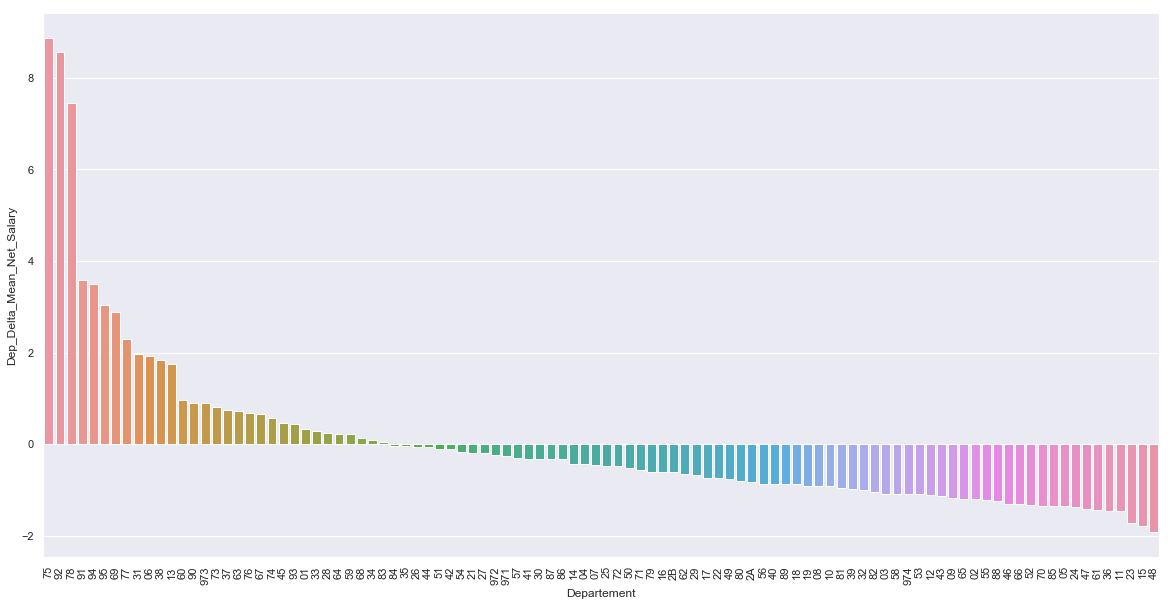

In [607]:
#plot the delta between the MNS and the mean of MNS to visualize this better
df_dep['Dep_Delta_Mean_Net_Salary'] = df_dep['Mean_Net_Salary'] - df_dep['Mean_Net_Salary'].mean()
fig=plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
snsbp = sns.barplot(data=df_dep,x='Departement',y='Dep_Delta_Mean_Net_Salary',ax=ax1,);
snsbp.set_xticklabels(snsbp.get_xticklabels(), rotation=90);

In [608]:
len(df_dep)

100

In [609]:
#Salary comparison per job category
mean_net_salary = df_dep[['Mean_Net_Salary','Mean_Net_Salary_F','Mean_Net_Salary_M',
                          'Mean_Net_Salary_Exe','Mean_Net_Salary_F_Exe','Mean_Net_Salary_M_Exe',
                          'Mean_Net_Salary_Mid','Mean_Net_Salary_F_Mid','Mean_Net_Salary_M_Mid',
                          'Mean_Net_Salary_Wor','Mean_Net_Salary_F_Wor','Mean_Net_Salary_M_Wor']].mean()

np_gender = np.array(['ALL','F','M','ALL','F','M','ALL','F','M','ALL','F','M'])
np_category = np.array(['GENERAL','GENERAL','GENERAL','EXE','EXE','EXE','MID','MID','MID','WOR','WOR','WOR'])

df_mns = pd.DataFrame({'mean_net_salary' : mean_net_salary.values, 'gender' : np_gender,'category' : np_category})
df_mns


,mean_net_salary,gender,category
0,13.320559,ALL,GENERAL
1,11.820430,F,GENERAL
2,14.352971,M,GENERAL
3,23.507357,ALL,EXE
4,20.135573,F,EXE
5,25.000665,M,EXE
6,14.431022,ALL,MID
7,13.186741,F,MID
8,15.305629,M,MID
9,11.032609,ALL,WOR


In [610]:
mean_net_salary_age = df_dep[['Mean_Net_Salary_18_25', 'Mean_Net_Salary_26_50', 'Mean_Net_Salary_50P',
       'Mean_Net_Salary_F_18_25', 'Mean_Net_Salary_F_26_50',
       'Mean_Net_Salary_F_50P', 'Mean_Net_Salary_M_18_25',
       'Mean_Net_Salary_M_26_50', 'Mean_Net_Salary_M_50P']].mean()
                         
np_gender = np.array(['ALL','ALL','ALL','F','F','F','M','M','M'])
np_category = np.array(['18_25','26_50','50P','18_25','26_50','50P','18_25','26_50','50P'])

df_mns_age = pd.DataFrame({'mean_net_salary' : mean_net_salary_age.values, 'gender' : np_gender,'category' : np_category})
df_mns_age

,mean_net_salary,gender,category
0,9.482952,ALL,18_25
1,13.090248,ALL,26_50
2,15.401669,ALL,50P
3,9.128299,F,18_25
4,11.794749,F,26_50
5,12.963863,F,50P
6,9.727982,M,18_25
7,13.981851,M,26_50
8,17.073138,M,50P


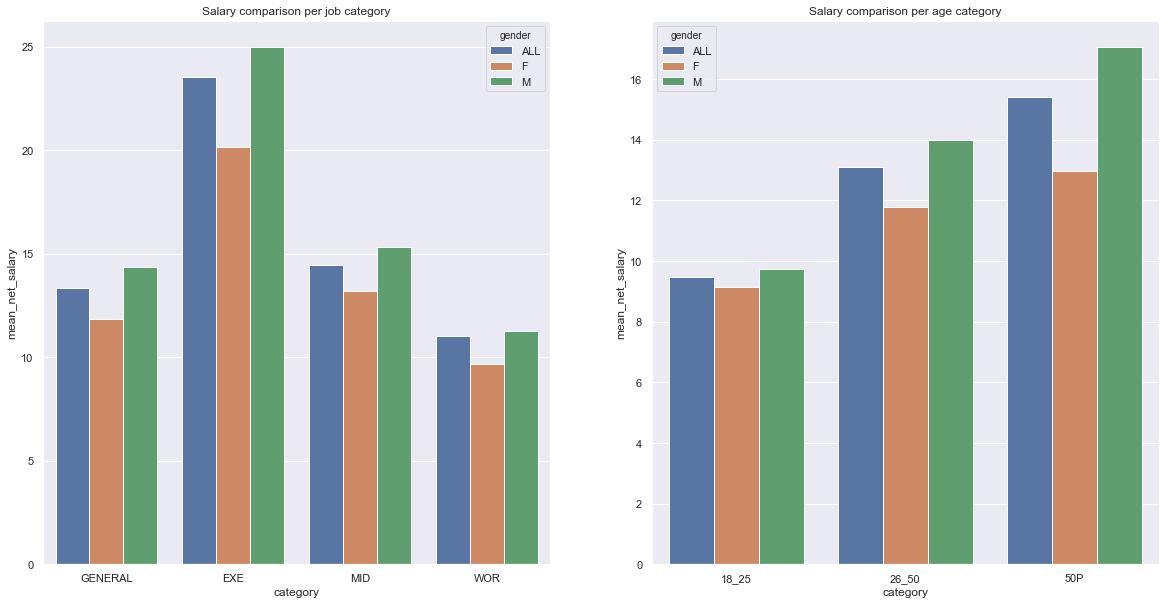

In [611]:
fig=plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Salary comparison per job category')
sns.barplot(x="category", y="mean_net_salary",hue="gender", data=df_mns,ax=ax1)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Salary comparison per age category')
sns.barplot(x="category", y="mean_net_salary",hue="gender", data=df_mns_age,ax=ax2)

In [612]:
#Impact of age category
mean_net_salary = df_dep[['Mean_Net_Salary','Mean_Net_Salary_F','Mean_Net_Salary_M',
                          'Mean_Net_Salary_Exe','Mean_Net_Salary_F_Exe','Mean_Net_Salary_M_Exe',
                          'Mean_Net_Salary_Mid','Mean_Net_Salary_F_Mid','Mean_Net_Salary_M_Mid',
                          'Mean_Net_Salary_Wor','Mean_Net_Salary_F_Wor','Mean_Net_Salary_M_Wor'
                         ]].mean()
np_gender = np.array(['ALL','F','M','ALL','F','M','ALL','F','M','ALL','F','M'])
np_category = np.array(['General','General','General','Executive','Executive','Executive','Middle','Middle','Middle','Worker','Worker','Worker'])

df_mns = pd.DataFrame({'mean_net_salary' : mean_net_salary.values, 'gender' : np_gender,'category' : np_category})
df_mns

,mean_net_salary,gender,category
0,13.320559,ALL,General
1,11.820430,F,General
2,14.352971,M,General
3,23.507357,ALL,Executive
4,20.135573,F,Executive
5,25.000665,M,Executive
6,14.431022,ALL,Middle
7,13.186741,F,Middle
8,15.305629,M,Middle
9,11.032609,ALL,Worker


## Using geopandas to visualize on France map

In [613]:
#as the map is only able to draw a map of the metropolitan France, we unfortunately need to drop the departement starting with 97X (overseas departments)
df_dp_metro = df_dep[~df_dep['Departement'].isin(['971','972','973','974'])]
df_dp_metro.head()


,Departement,Mean_Net_Salary,Mean_Net_Salary_Exe,Mean_Net_Salary_Mid,Mean_Net_Salary_Emp,Mean_Net_Salary_Wor,Mean_Net_Salary_F,Mean_Net_Salary_F_Exe,Mean_Net_Salary_F_Mid,Mean_Net_Salary_F_Emp,...,Total_1_5,Total_6_9,Total_10_19,Total_20_49,Total_50_99,Total_100_199,Total_200_499,Total_500P,Diff_Mean_Net_Salary_M_F,Dep_Delta_Mean_Net_Salary
75,75,22.200000,31.900000,17.200000,12.300000,13.200000,19.100000,26.700000,15.800000,12.100000,...,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000,5.600000,8.879441
92,92,21.891429,30.485714,16.928571,12.671429,14.117143,18.922857,26.354286,15.928571,12.440000,...,674.828571,139.400000,108.085714,79.514286,32.028571,20.114286,14.714286,6.942857,5.354286,8.570870
78,78,20.770588,30.032353,17.343137,12.498039,14.463725,16.819608,24.604902,15.368627,12.158824,...,163.411765,33.833333,23.000000,14.872549,4.921569,2.892157,1.500000,0.696078,6.581373,7.450029
91,91,16.906000,25.986000,15.940000,12.029000,12.531000,14.897000,22.775000,14.951000,11.772000,...,141.550000,30.430000,22.210000,13.540000,4.950000,2.650000,1.380000,0.470000,3.399000,3.585441
94,94,16.825532,25.904255,15.891489,11.774468,12.097872,15.157447,22.897872,15.104255,11.655319,...,381.468085,79.553191,56.382979,35.127660,12.510638,5.553191,4.106383,1.489362,2.910638,3.504973


In [614]:
df_dp_metro.columns

Index(['Departement', 'Mean_Net_Salary', 'Mean_Net_Salary_Exe',
       'Mean_Net_Salary_Mid', 'Mean_Net_Salary_Emp', 'Mean_Net_Salary_Wor',
       'Mean_Net_Salary_F', 'Mean_Net_Salary_F_Exe', 'Mean_Net_Salary_F_Mid',
       'Mean_Net_Salary_F_Emp', 'Mean_Net_Salary_F_Wor', 'Mean_Net_Salary_M',
       'Mean_Net_Salary_M_Exe', 'Mean_Net_Salary_M_Mid',
       'Mean_Net_Salary_M_Emp', 'Mean_Net_Salary_M_Wor',
       'Mean_Net_Salary_18_25', 'Mean_Net_Salary_26_50', 'Mean_Net_Salary_50P',
       'Mean_Net_Salary_F_18_25', 'Mean_Net_Salary_F_26_50',
       'Mean_Net_Salary_F_50P', 'Mean_Net_Salary_M_18_25',
       'Mean_Net_Salary_M_26_50', 'Mean_Net_Salary_M_50P', 'Region',
       'Total_Firms', 'Total_Unknown', 'Total_1_5', 'Total_6_9', 'Total_10_19',
       'Total_20_49', 'Total_50_99', 'Total_100_199', 'Total_200_499',
       'Total_500P', 'Diff_Mean_Net_Salary_M_F', 'Dep_Delta_Mean_Net_Salary'],
      dtype='object')

In [615]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.boxplot(x="REGION",y="MNS",data=df_highest_dep)


In [616]:
# import a Geomap from France, including details at departement level
fp = "FRA_adm2.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,79,FRA,France,1,Alsace,1,Bas-Rhin,DÃ©partement,Department,None,UnterelsaÃ¡,"POLYGON ((7.115058898925895 49.07059097290039,..."
1,79,FRA,France,1,Alsace,2,Haut-Rhin,DÃ©partement,Department,None,OberelsaÃ¡,"POLYGON ((7.218358993530387 48.31089019775402,..."
2,79,FRA,France,2,Aquitaine,3,Dordogne,DÃ©partement,Department,None,None,POLYGON ((0.6502944827080341 45.69758605957037...
3,79,FRA,France,2,Aquitaine,4,Gironde,DÃ©partement,Department,None,Bec-D'Ambes,(POLYGON ((-1.175971984863224 44.7048606872558...
4,79,FRA,France,2,Aquitaine,5,Landes,DÃ©partement,Department,None,Landas,POLYGON ((-1.085166454315186 44.53219604492193...


In [617]:
#French language uses accents so some Departement names were wrongly imported , we need to take care of this
# Ã´ = ô
# Ã© = é
# Ã¨ = è
# 
map_df['NAME_2'] = map_df['NAME_2'].str.replace('Ã´','ô')
map_df['NAME_2'] = map_df['NAME_2'].str.replace('Ã©','é')
map_df['NAME_2'] = map_df['NAME_2'].str.replace('Ã¨','è')

In [618]:
# departements names are coming as text, we need to rename them to departement numbers (thanks to my primary school teachers ;-)
departements = {'Bas-Rhin' : '67', 'Haut-Rhin' : '68', 'Dordogne' : '24', 'Gironde' : '33', 
                'Landes' : '40','Lot-et-Garonne' : '47', 'Pyrénées-Atlantiques' : '64', 
                'Allier' : '03', 'Cantal' : '15', 'Haute-Loire' : '43', 'Puy-de-Dôme' : '63',
                'Essonne' : '91', 'Hauts-de-Seine' : '92', 'Paris' : '75',
                'Seine-et-Marne' : '77', 'Seine-Saint-Denis' : '93', "Val-d'Oise" : '95',
                'Val-de-Marne' : '94', 'Yvelines' : '78', 'Calvados' : '14', 'Manche' : '50',
                'Orne' : '61',"Côte-d'Or" : '21', 'Nièvre' : '58', 'Saône-et-Loire' : '71', 
                'Yonne' : '89', "Côtes-d'Armor" : '22','Finistère' : '29', 'Ille-et-Vilaine' : '35',
                'Morbihan' : '56', 'Cher' : '18', 'Eure-et-Loir' : '28',
                'Indre-et-Loire' : '37', 'Indre' : '36', 'Loir-et-Cher' : '41', 'Loiret' : '45',
                'Ardennes' : '08', 'Aube' : '10', 'Haute-Marne' : '52', 'Marne' : '51', 'Corse-du-Sud' :'2A', 
                'Haute-Corse' : '2B', 'Doubs' : '25', 'Haute-Saône' : '70', 'Jura' : '39', 'Territoire de Belfort' :'90', 
                'Eure' : '27', 'Seine-Maritime' : '76', 'Aude' : '11', 'Gard' : '30', 'Hérault' : '34', 'Lozère' : '48',
                'Pyrénées-Orientales' : '66', 'Corrèze' : '19', 'Creuse' : '23', 'Haute-Vienne' : '87',
                'Meurthe-et-Moselle' : '54', 'Meuse' : '55', 'Moselle' : '57', 'Vosges' : '88', 'Ariège' : '09',
                'Aveyron' : '12', 'Gers' : '32', 'Haute-Garonne' : '31', 'Hautes-Pyrénées' : '65', 'Lot' : '46',
                'Tarn-et-Garonne' : '82', 'Tarn' : '81', 'Nord' : '59', 'Pas-de-Calais' : '62',
                'Loire-Atlantique' : '44', 'Maine-et-Loire' : '49', 'Mayenne' : '53', 'Sarthe' : '72',
                'Vendée' : '85', 'Aisne' : '02', 'Oise' : '60', 'Somme' : '80', 'Charente-Maritime' : '17',
                'Charente' : '16', 'Deux-Sèvres' : '79', 'Vienne' : '86', 'Alpes-de-Haute-Provence' : '04',
                'Alpes-Maritimes' : '06', 'Bouches-du-Rhône' : '13', 'Hautes-Alpes' : '05', 'Var' :'83',
                'Vaucluse' : '84', 'Ain' : '01', 'Ardèche' : '07', 'Drôme' : '26', 'Haute-Savoie' : '74', 'Isère' : '38',
                'Loire' : '42', 'Rhône' : '69', 'Savoie' : '73'}

In [619]:
#remapping the department text to their corresponding number using the list above
map_df['NAME_2']=map_df['NAME_2'].map(departements)

In [620]:
# renaming the column NAME_2 to something more meaninfull : 'DEPARTEMENT'
map_df.rename(columns={"NAME_2": "Departement"},inplace=True)

In [621]:
#let's now merge the geopandas with the main dataframe including salaries, men/women comparison, firms size, etc
merged = map_df.merge(df_dp_metro,on='Departement')

In [622]:
# create a function to plot on the map
def plot_column(columnname):
    vmin, vmax = int(np.min(merged[columnname])), int(np.max(merged[columnname]))
    fig, ax = plt.subplots(1, figsize=(20, 10))
    merged.plot(column=columnname,cmap=plt.cm.Blues,ax=ax, scheme='Quantiles',legend=True,k=10) #plt.cm.plasma 'OrRd'


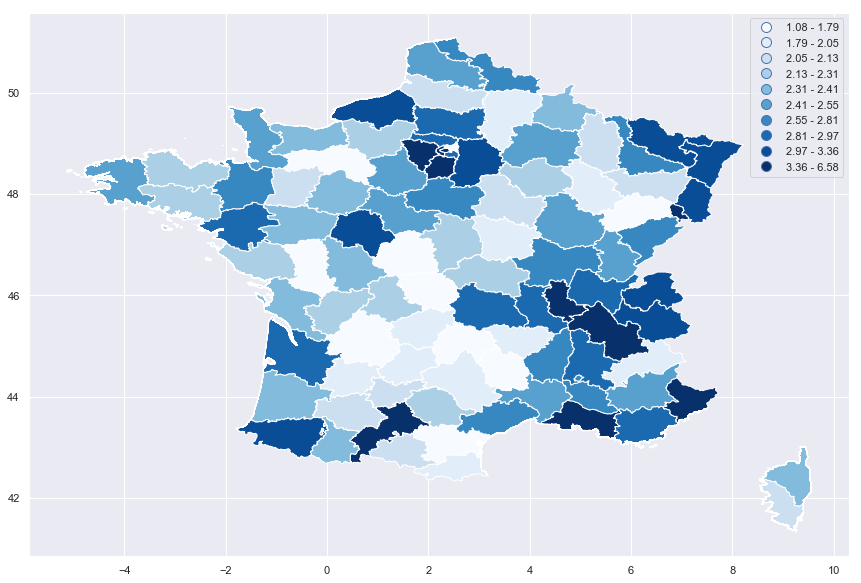

In [623]:
#which departements in France have the highest salary (for everyone, both men and women)?
plot_column('Diff_Mean_Net_Salary_M_F')

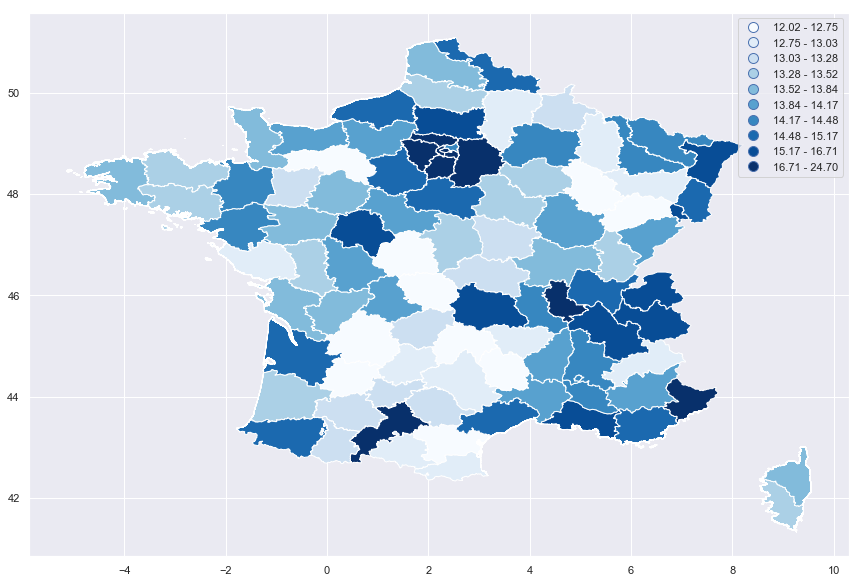

In [624]:
# in which departements in France will men get the highest salary ?
plot_column('Mean_Net_Salary_M')

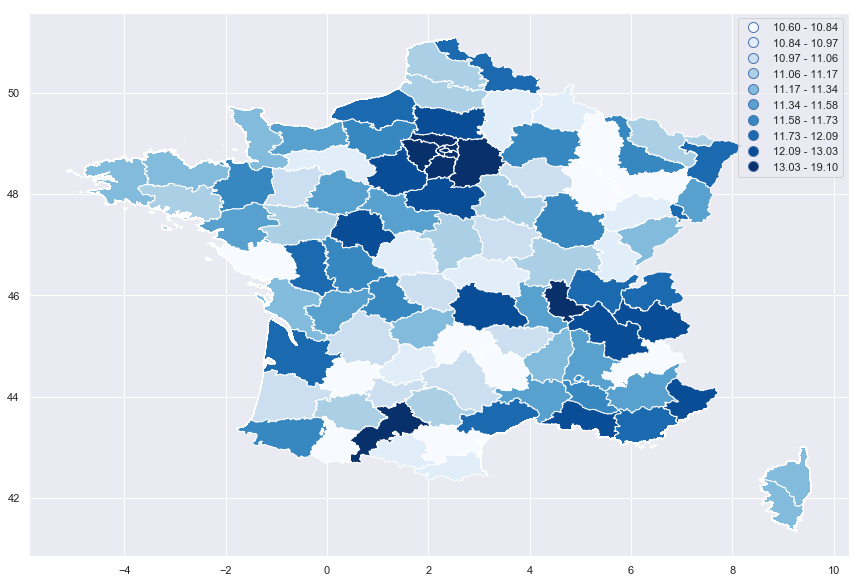

In [625]:
# in which departements in France will women get the highest salary ?
plot_column('Mean_Net_Salary_F')

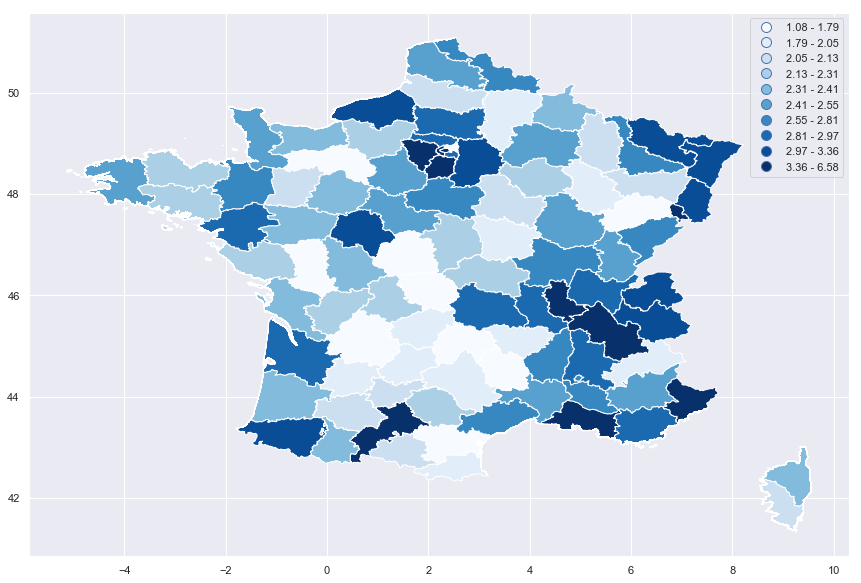

In [626]:
# which departements in France have the largest gender inequality, salary wise ?
plot_column('Diff_Mean_Net_Salary_M_F')

# Let's do some clustering

In [627]:
#df_merged = pd.get_dummies(df_merged,columns=['REGION','DEPARTEMENT'])
#df_merged.shape

In [628]:
df_merged.columns

Index(['Inseecode', 'City', 'Mean_Net_Salary', 'Mean_Net_Salary_Exe',
       'Mean_Net_Salary_Mid', 'Mean_Net_Salary_Emp', 'Mean_Net_Salary_Wor',
       'Mean_Net_Salary_F', 'Mean_Net_Salary_F_Exe', 'Mean_Net_Salary_F_Mid',
       'Mean_Net_Salary_F_Emp', 'Mean_Net_Salary_F_Wor', 'Mean_Net_Salary_M',
       'Mean_Net_Salary_M_Exe', 'Mean_Net_Salary_M_Mid',
       'Mean_Net_Salary_M_Emp', 'Mean_Net_Salary_M_Wor',
       'Mean_Net_Salary_18_25', 'Mean_Net_Salary_26_50', 'Mean_Net_Salary_50P',
       'Mean_Net_Salary_F_18_25', 'Mean_Net_Salary_F_26_50',
       'Mean_Net_Salary_F_50P', 'Mean_Net_Salary_M_18_25',
       'Mean_Net_Salary_M_26_50', 'Mean_Net_Salary_M_50P', 'Region',
       'Departement', 'Total_Firms', 'Total_Unknown', 'Total_1_5', 'Total_6_9',
       'Total_10_19', 'Total_20_49', 'Total_50_99', 'Total_100_199',
       'Total_200_499', 'Total_500P', 'Diff_Mean_Net_Salary_M_F'],
      dtype='object')

In [629]:
df_clustering = merged[['Mean_Net_Salary', 'Mean_Net_Salary_Exe',
       'Mean_Net_Salary_Mid', 'Mean_Net_Salary_Emp', 'Mean_Net_Salary_Wor',
       'Mean_Net_Salary_F', 'Mean_Net_Salary_F_Exe', 'Mean_Net_Salary_F_Mid',
       'Mean_Net_Salary_F_Emp', 'Mean_Net_Salary_F_Wor', 'Mean_Net_Salary_M',
       'Mean_Net_Salary_M_Exe', 'Mean_Net_Salary_M_Mid',
       'Mean_Net_Salary_M_Emp', 'Mean_Net_Salary_M_Wor',
       'Mean_Net_Salary_18_25', 'Mean_Net_Salary_26_50', 'Mean_Net_Salary_50P',
       'Mean_Net_Salary_F_18_25', 'Mean_Net_Salary_F_26_50',
       'Mean_Net_Salary_F_50P', 'Mean_Net_Salary_M_18_25',
       'Mean_Net_Salary_M_26_50', 'Mean_Net_Salary_M_50P', 
       'Departement']]

In [630]:
merged.shape

(96, 49)

In [631]:
df_clustering = df_merged[['Mean_Net_Salary', 'Mean_Net_Salary_Exe',
       'Mean_Net_Salary_Mid', 'Mean_Net_Salary_Emp', 'Mean_Net_Salary_Wor',
       'Mean_Net_Salary_F', 'Mean_Net_Salary_F_Exe', 'Mean_Net_Salary_F_Mid',
       'Mean_Net_Salary_F_Emp', 'Mean_Net_Salary_F_Wor', 'Mean_Net_Salary_M',
       'Mean_Net_Salary_M_Exe', 'Mean_Net_Salary_M_Mid',
       'Mean_Net_Salary_M_Emp', 'Mean_Net_Salary_M_Wor',
       'Mean_Net_Salary_18_25', 'Mean_Net_Salary_26_50', 'Mean_Net_Salary_50P',
       'Mean_Net_Salary_F_18_25', 'Mean_Net_Salary_F_26_50',
       'Mean_Net_Salary_F_50P', 'Mean_Net_Salary_M_18_25',
       'Mean_Net_Salary_M_26_50', 'Mean_Net_Salary_M_50P', 
       'Departement']]

In [632]:
#address the encoding of Corsica departements, both being non numerical (2A & 2B)
df_clustering['Departement'].replace(to_replace='2A',value='2001',inplace=True)
df_clustering['Departement'].replace(to_replace='2B',value='2002',inplace=True)

C:\Program\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [633]:
df_clustering.Departement.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2001', '2002', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42',
       '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86',
       '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972',
       '973', '974'], dtype=object)

In [634]:
#let's use TSNE as it is a convenient way to visualize clusters mapped to 2D dimensions space
from sklearn.manifold import TSNE
ts = TSNE(learning_rate=100,random_state=42)
df_clustering_tsne = ts.fit_transform(df_clustering)


In [635]:
x_ts = df_clustering_tsne[:,0]
y_ts = df_clustering_tsne[:,1]

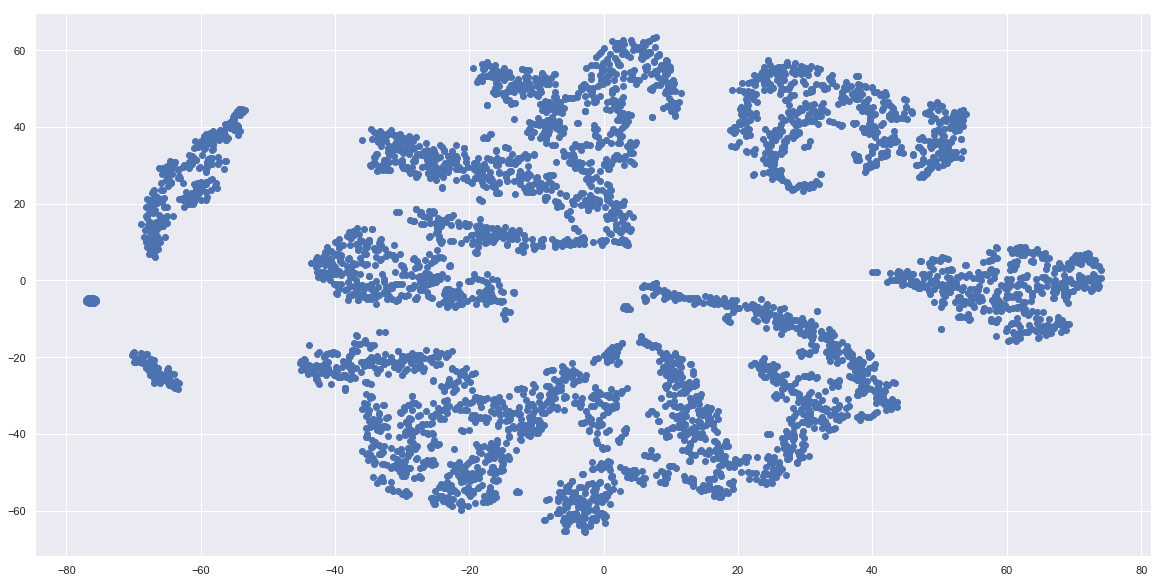

In [636]:
plt.figure(figsize=(20,10))
plt.scatter(x_ts,y_ts);

In [637]:
from sklearn.cluster import KMeans

def do_kmeans(data,nbclusters):
    model = KMeans(n_clusters=nbclusters,random_state=42)
    model.fit(data)
    preds = model.predict(data)
    return model,preds

# compute the average within-cluster distances.
def compute_avg_distance(data,model,prediction):
    dist = 0
    for x, pred in zip(data, prediction):
        dist += ((x - model.cluster_centers_[pred]) ** 2).sum()
    dist /= data.shape[0]
    return dist

In [638]:
clusters=list(range(1,20))
distance=[]
score=[]
for i in clusters:
    print('iteration with clusters = {}'.format(i))
    model,preds = do_kmeans(df_clustering_tsne,nbclusters=i)
    distance.append(compute_avg_distance(df_clustering_tsne,model,preds))
    score.append(model.score(df_clustering_tsne))
    print('score : {}'.format(model.score(df_clustering_tsne)))

iteration with clusters = 1
score : -12051864.0
iteration with clusters = 2
score : -7380354.0
iteration with clusters = 3
score : -4354479.5
iteration with clusters = 4
score : -2912675.5
iteration with clusters = 5
score : -2274182.25
iteration with clusters = 6
score : -1771024.125
iteration with clusters = 7
score : -1420117.25
iteration with clusters = 8
score : -1194050.0
iteration with clusters = 9
score : -1032234.875
iteration with clusters = 10
score : -906526.375
iteration with clusters = 11
score : -801264.875
iteration with clusters = 12
score : -726386.125
iteration with clusters = 13
score : -650635.125
iteration with clusters = 14
score : -592180.375
iteration with clusters = 15
score : -528450.25
iteration with clusters = 16
score : -478957.09375
iteration with clusters = 17
score : -451090.8125
iteration with clusters = 18
score : -428689.84375
iteration with clusters = 19
score : -400787.75


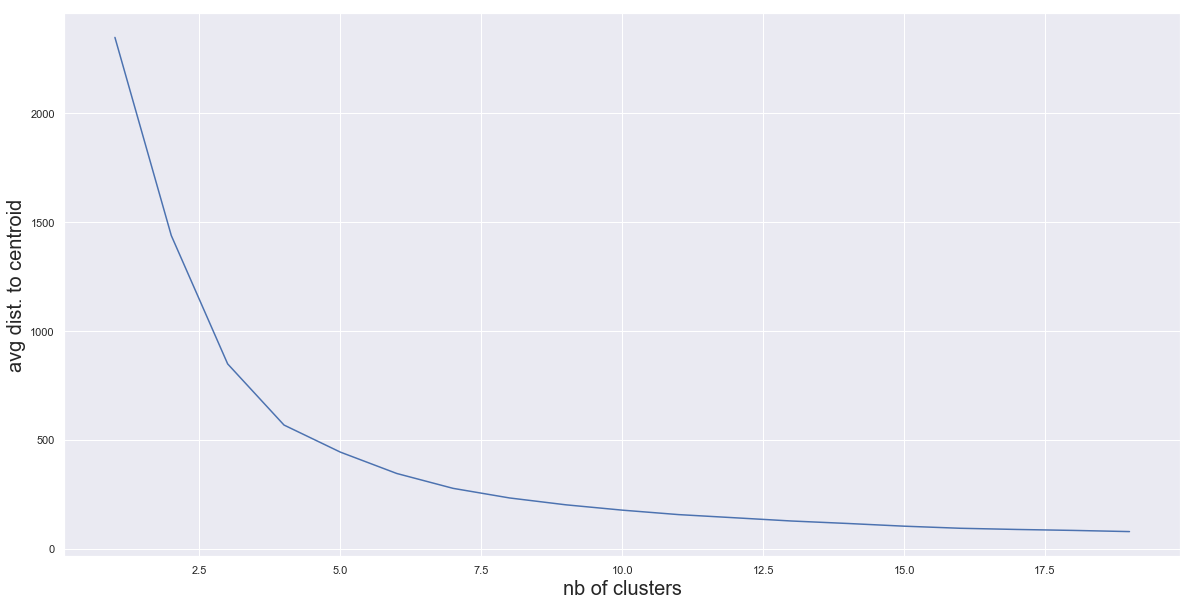

In [639]:
plt.figure(figsize=(20,10))
plt.xlabel('nb of clusters', size = 20)

plt.ylabel('avg dist. to centroid', size = 20)

plt.plot(clusters,distance)


In [640]:
# using the elbow method, i will keep 4 clusters moving forward
# redoing the KMeans clusters using n_clusters = 5
model,preds = do_kmeans(df_clustering_tsne,nbclusters=5)

In [641]:
preds

array([1, 1, 1, ..., 4, 4, 4])

KeyError: 96

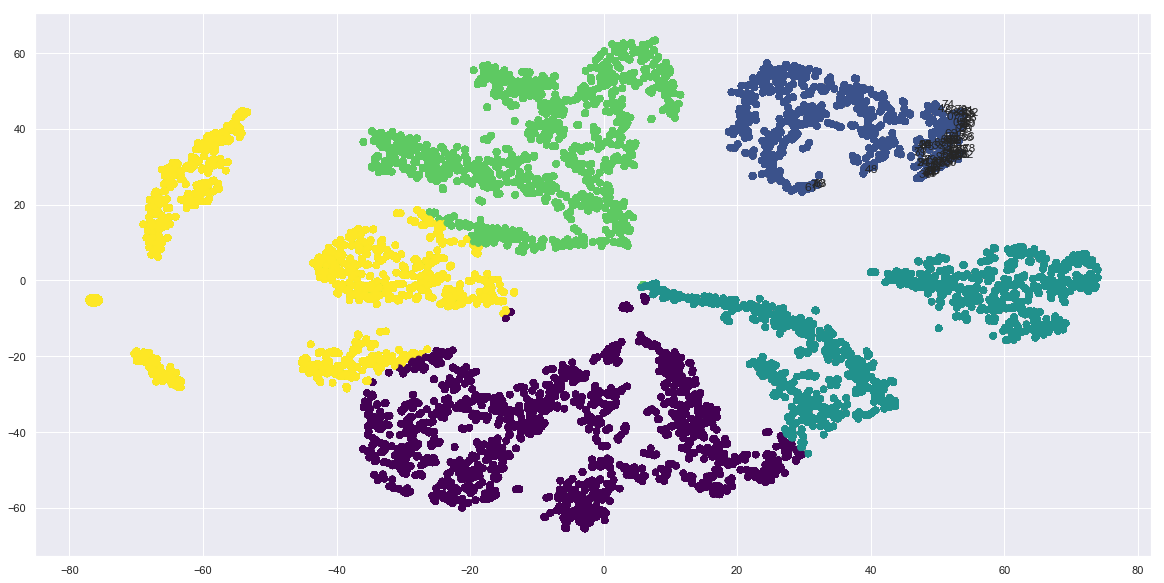

In [642]:
plt.figure(figsize=(20,10))
for i,type in enumerate(preds):
    x = x_ts[i]
    y = y_ts[i]
    #print(merged['Departement'][i])
    plt.scatter(x_ts, y_ts, c=preds,cmap='viridis')
    plt.text(x+0.3, y+0.3, merged['Departement'][i], fontsize=12)
plt.show()